# Analysis Perspective: Movie Genres and Ratings Relationship

## Business Outcome

   The business recommendation ...


## The Data

   In this part of analysis, we will investigate the relationship between movie genres and ratings! We will use IMDB ratings data, stored in 'imdb.title.ratings.csv.gz' file, and IMDB movie title basisc data stored in 'imdb.title.basics.csv' file. 

Let's start reading these data files into two seperate Pandas dataframes. 

## Step 1. Importing Tools and the Information

First we need to import the libraries we will use for performing data exploration, analysis, and data visualization. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz', compression='gzip')
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [3]:
imdb_title_basics = pd.read_csv('imdb.title.basics.csv')
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


## Step 2. Preparing our Dataframes 

### Step 2.1. Merging Dataframes

Before analysing the data, we need to construct the desited dataframe from IMDB dataframes above. 

First of all, let's start with merging these two datafames by using 'tconst' column in both dataframes, and create a new 'imdb_title_and_ratings' dataframe.     

In [4]:
imbd_title_and_ratings = pd.merge(imdb_title_ratings, imdb_title_basics, on='tconst')
imbd_title_and_ratings

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


The imbd_title_and_ratings dataframe contains movies from 2010 to 2019.  

In [5]:
imbd_title_and_ratings.sort_values(by='start_year', ascending=False)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
23991,tt5929354,5.1,18,"Out of Sight, Out of Mind","Out of Sight, Out of Mind",2019,131.0,Drama
24002,tt5969180,6.5,1312,I Hate Kids,I Hate Kids,2019,89.0,Comedy
24012,tt6032090,8.6,15,Use Me,Use Me,2019,NaN,Thriller
24028,tt6081668,7.6,51,Mating,Parningsmarknaden,2019,93.0,Documentary
...,...,...,...,...,...,...,...,...
36328,tt1754573,8.8,21,Taliya.Date.Com,Taliya.Date.Com,2010,54.0,"Biography,Comedy,Documentary"
36325,tt1753960,7.4,67,Israel vs Israel,Israel vs Israel,2010,58.0,Documentary
17412,tt1640202,4.3,3706,Çok Filim Hareketler Bunlar,Çok Filim Hareketler Bunlar,2010,134.0,Comedy
17411,tt1639457,5.6,11,Indiana Jones und der Speer des Schicksals,Indiana Jones und der Speer des Schicksals,2010,66.0,"Action,Adventure"


Now, we need to sort the dataframe from highest to lowest rating movie!

We need to split genres name into separate categories!


In [6]:
sorted_df = imbd_title_and_ratings.sort_values(by='averagerating', ascending=False)
sorted_df['genres']= sorted_df['genres'].str.split(",")
sorted_df = sorted_df.explode('genres')
sorted_df

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
27644,tt8730716,10.0,5,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,Crime
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,Documentary
26153,tt2632430,10.0,5,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
65033,tt9715646,10.0,20,Renegade,Renegade,2019,NaN,Documentary
...,...,...,...,...,...,...,...,...
32440,tt2087999,1.0,7,Transgender Trouble,Transgender Trouble,2011,100.0,Music
36456,tt1896768,1.0,21,Kikkake wa You!,Kikkake wa You!,2011,75.0,Drama
36456,tt1896768,1.0,21,Kikkake wa You!,Kikkake wa You!,2011,75.0,Music
54856,tt1976600,1.0,436,Pick the Youth,Pi ke qing chun,2011,85.0,Drama


### Step 2.2. Genre Counts

In our analysis, we need to compare average ratings with genres. 

We can look into the genre types in the 'sorted_imdb_title_and_ratings' dataframe, and see number of movie produced in each genre between 2010 and 2019. 

In [7]:
sorted_df['genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genres, dtype: int64

We will filter out any genre which has less than 30 entries due to respresentation concerns. According to value counts above, we need to filter out all movies with genres as Reality-TV, Adult, Game-Show, and Short from our analysis.

In [8]:
sorted_df['genres'].value_counts().values <= 30

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True])

In [9]:
sorted_df = sorted_df[sorted_df.genres != 'Reality-TV']

In [10]:
sorted_df = sorted_df[sorted_df.genres != 'Adult']

In [11]:
sorted_df = sorted_df[sorted_df.genres != 'Game-Show']

In [12]:
sorted_df = sorted_df[sorted_df.genres != 'Short']

In [13]:
sorted_df['genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Name: genres, dtype: int64

## Step 3. Grouping Ratings By Genres

In [14]:
imdb_mov_rat = sorted_df[['averagerating', 'genres']]
imdb_mov_rat

,averagerating,genres
27644,10.0,Documentary
8992,10.0,Crime
8992,10.0,Documentary
26153,10.0,Documentary
65033,10.0,Documentary
...,...,...
32440,1.0,Music
36456,1.0,Drama
36456,1.0,Music
54856,1.0,Drama


We will group by genres and calculate average ratings associated with each genre. 

In [15]:
imdb_mov_rat.groupby(['genres']).mean().sort_values(by='averagerating', ascending=False)

,averagerating
genres,
Documentary,7.332090
News,7.271330
Biography,7.162274
Music,7.091972
History,7.040956
Sport,6.961493
War,6.584291
Musical,6.498336
Drama,6.401559


In [16]:
imdb_genre_rating_df = imdb_mov_rat.groupby(['genres']).agg(['mean', 'count']).sort_values(by=('averagerating',  'mean'), ascending =False)
imdb_genre_rating_df

averagerating       
                     mean  count
genres                          
Documentary      7.332090  17753
News             7.271330    579
Biography        7.162274   3809
Music            7.091972   1968
History          7.040956   2825
Sport            6.961493   1179
War              6.584291    853
Musical          6.498336    721
Drama            6.401559  30788
Family           6.394725   3412
Animation        6.248308   1743
Adventure        6.196201   3817
Romance          6.146608   6589
Crime            6.115441   4611
Comedy           6.002689  17290
Mystery          5.920401   3039
Fantasy          5.919473   2126
Western          5.868214    280
Action           5.810361   6988
Thriller         5.639114   8217
Sci-Fi           5.489755   2206
Horror           5.003440   7674

## Step 4. Visualization 

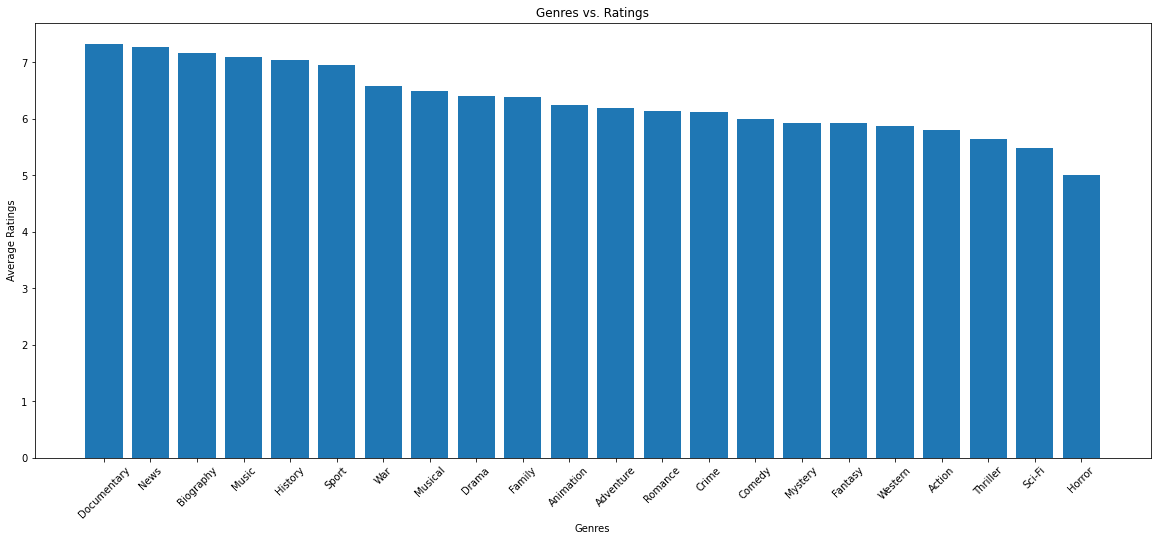

In [17]:
fig, ax = plt.subplots(figsize=(20, 8)) 
plt.xticks(rotation=45)
ax.bar(x=imdb_genre_rating_df.index, height=imdb_genre_rating_df[('averagerating',  'mean')])
ax.set_title('Genres vs. Ratings')
ax.set_xlabel('Genres')
ax.set_ylabel('Average Ratings');